In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline


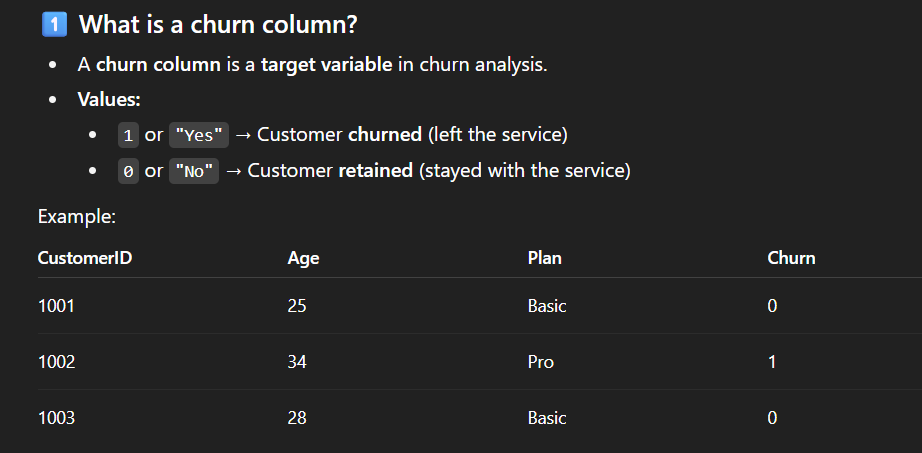

In [3]:
foodpanda_dataset = pd.read_csv('datasets/Foodpanda Analysis Dataset.csv') # original dataset
df = pd.read_csv('datasets/Foodpanda Analysis Dataset.csv')

## Dataset Overview

In [4]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


In [5]:
df.shape

(6000, 20)

In [6]:
# checking data types of each column

df.dtypes
# Goal: convert Date-related columns from object dtype to datetime

customer_id         object
gender              object
age                 object
city                object
signup_date         object
order_id            object
order_date          object
restaurant_name     object
dish_name           object
category            object
quantity             int64
price              float64
payment_method      object
order_frequency      int64
last_order_date     object
loyalty_points       int64
churned             object
rating               int64
rating_date         object
delivery_status     object
dtype: object

In [7]:
# checking null values
df.isna().sum()

customer_id        0
gender             0
age                0
city               0
signup_date        0
order_id           0
order_date         0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
last_order_date    0
loyalty_points     0
churned            0
rating             0
rating_date        0
delivery_status    0
dtype: int64

In [8]:
# checking duplicated records
df.duplicated().sum()

np.int64(0)

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_date'].dtype

dtype('<M8[ns]')

In [10]:
# time range covered by the data (earliest and latest order date)
min_order_date = df['order_date'].min().date()
max_order_date = df['order_date'].max().date()

print("Min: ", min_order_date)
print("Max: ", max_order_date)

Min:  2023-08-23
Max:  2025-08-22


In [11]:
df.dtypes

customer_id                object
gender                     object
age                        object
city                       object
signup_date                object
order_id                   object
order_date         datetime64[ns]
restaurant_name            object
dish_name                  object
category                   object
quantity                    int64
price                     float64
payment_method             object
order_frequency             int64
last_order_date            object
loyalty_points              int64
churned                    object
rating                      int64
rating_date                object
delivery_status            object
dtype: object

## Customer Behavior

In [12]:
df['customer_id'].nunique, len(df)

(<bound method IndexOpsMixin.nunique of 0       C5663
 1       C2831
 2       C2851
 3       C1694
 4       C4339
         ...  
 5995    C6849
 5996    C3787
 5997    C2841
 5998    C1624
 5999    C2068
 Name: customer_id, Length: 6000, dtype: object>,
 6000)

### 1. Which customers place the most orders? (Top 10)

In [13]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,2023-08-23,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,2023-08-23,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,2023-08-23,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,2023-08-23,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,2023-08-24,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


In [14]:
df.sort_values('order_frequency', ascending = False).head(10)

# the top 10 has the same order_frequency, so I will use a boolean masking using 'churned' column

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
1342,C4767,Female,Adult,Islamabad,4/20/2025,O8767,2024-01-30,Burger King,Fries,Italian,1,806.81,Cash,50,8/1/2025,311,Active,3,1/13/2025,Delayed
3682,C6505,Other,Senior,Multan,9/18/2024,O10505,2024-11-11,Burger King,Burger,Italian,5,1334.61,Card,50,4/13/2025,245,Active,4,12/20/2024,Delivered
2912,C4147,Female,Senior,Peshawar,12/7/2023,O8147,2024-08-12,McDonald's,Burger,Fast Food,2,279.95,Wallet,50,10/19/2024,468,Active,5,7/26/2025,Delayed
4121,C4658,Male,Senior,Lahore,6/9/2025,O8658,2025-01-04,Pizza Hut,Sandwich,Chinese,2,1409.82,Wallet,50,11/27/2024,429,Inactive,2,12/19/2024,Delayed
4108,C3168,Other,Senior,Karachi,11/19/2023,O7168,2025-01-03,Burger King,Sandwich,Fast Food,1,523.02,Wallet,50,11/15/2024,279,Inactive,5,3/23/2025,Cancelled
1242,C4582,Female,Teenager,Multan,2/3/2024,O8582,2024-01-17,McDonald's,Pasta,Fast Food,1,1103.37,Card,50,6/3/2025,474,Inactive,4,3/22/2025,Delayed
5026,C1894,Female,Adult,Multan,10/29/2023,O5894,2025-04-20,Burger King,Sandwich,Chinese,2,588.96,Wallet,50,7/12/2025,188,Active,2,7/16/2025,Cancelled
1504,C2032,Male,Adult,Peshawar,1/9/2024,O6032,2024-02-21,McDonald's,Fries,Fast Food,3,1378.28,Cash,50,6/20/2025,107,Inactive,2,7/15/2025,Cancelled
3968,C1534,Female,Adult,Peshawar,4/11/2025,O5534,2024-12-17,Pizza Hut,Pasta,Continental,1,1310.78,Card,50,7/10/2025,148,Inactive,5,8/11/2025,Cancelled
2887,C1076,Female,Adult,Karachi,12/10/2023,O5076,2024-08-09,McDonald's,Sandwich,Fast Food,2,1151.01,Wallet,50,12/20/2024,338,Inactive,4,8/6/2025,Delayed


In [15]:
# boolean mask
is_active = df['churned'] == 'Active'

active_customers = df[is_active]
inactive_customers = df[~is_active]

In [16]:
active_customers.count()

customer_id        3016
gender             3016
age                3016
city               3016
signup_date        3016
order_id           3016
order_date         3016
restaurant_name    3016
dish_name          3016
category           3016
quantity           3016
price              3016
payment_method     3016
order_frequency    3016
last_order_date    3016
loyalty_points     3016
churned            3016
rating             3016
rating_date        3016
delivery_status    3016
dtype: int64

In [17]:
inactive_customers.count()

customer_id        2984
gender             2984
age                2984
city               2984
signup_date        2984
order_id           2984
order_date         2984
restaurant_name    2984
dish_name          2984
category           2984
quantity           2984
price              2984
payment_method     2984
order_frequency    2984
last_order_date    2984
loyalty_points     2984
churned            2984
rating             2984
rating_date        2984
delivery_status    2984
dtype: int64

In [18]:
active_customers.sort_values('order_frequency', ascending = False).head(10)

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
76,C6466,Other,Senior,Islamabad,2/14/2024,O10466,2023-08-31,KFC,Fries,Chinese,1,1492.84,Wallet,50,3/28/2025,423,Active,1,2/9/2025,Cancelled
100,C3877,Other,Teenager,Islamabad,10/22/2024,O7877,2023-09-03,KFC,Fries,Continental,4,213.52,Cash,50,1/22/2025,24,Active,3,12/14/2024,Cancelled
99,C2631,Female,Adult,Lahore,11/8/2024,O6631,2023-09-03,Subway,Pasta,Continental,2,1174.62,Card,50,2/11/2025,64,Active,5,3/24/2025,Cancelled
5964,C6477,Male,Adult,Peshawar,10/18/2023,O10477,2025-08-18,Burger King,Pasta,Italian,2,185.72,Wallet,50,10/30/2024,440,Active,3,2/21/2025,Cancelled
115,C6318,Male,Teenager,Islamabad,1/17/2025,O10318,2023-09-06,McDonald's,Sandwich,Continental,3,1428.01,Cash,50,10/10/2024,185,Active,4,5/21/2025,Cancelled
3560,C1619,Female,Senior,Lahore,11/7/2024,O5619,2024-10-27,McDonald's,Fries,Italian,2,1394.81,Cash,50,9/8/2024,158,Active,5,11/2/2024,Delayed
3503,C2072,Other,Teenager,Lahore,7/25/2025,O6072,2024-10-19,Pizza Hut,Burger,Chinese,5,349.23,Wallet,50,12/17/2024,452,Active,5,8/9/2025,Delivered
5842,C3756,Male,Adult,Karachi,7/13/2025,O7756,2025-08-04,Subway,Sandwich,Continental,1,655.24,Cash,50,2/22/2025,151,Active,5,4/10/2025,Delivered
3572,C6451,Other,Adult,Peshawar,3/27/2025,O10451,2024-10-28,McDonald's,Pasta,Italian,5,182.57,Cash,50,1/4/2025,378,Active,2,4/25/2025,Delayed
3651,C4608,Male,Adult,Multan,8/11/2025,O8608,2024-11-07,Subway,Fries,Continental,1,1161.06,Wallet,50,9/27/2024,355,Active,2,5/24/2025,Cancelled


In [19]:
inactive_customers.sort_values('order_frequency', ascending = False).head(10)

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
90,C5340,Male,Teenager,Peshawar,5/9/2024,O9340,2023-09-02,McDonald's,Pasta,Continental,1,1047.07,Wallet,50,1/29/2025,328,Inactive,2,9/1/2024,Delayed
5837,C5150,Female,Senior,Lahore,3/27/2024,O9150,2025-08-04,Pizza Hut,Pasta,Chinese,3,227.90,Wallet,50,4/4/2025,211,Inactive,4,7/6/2025,Delayed
4108,C3168,Other,Senior,Karachi,11/19/2023,O7168,2025-01-03,Burger King,Sandwich,Fast Food,1,523.02,Wallet,50,11/15/2024,279,Inactive,5,3/23/2025,Cancelled
2216,C4250,Other,Senior,Peshawar,4/21/2025,O8250,2024-05-19,Burger King,Burger,Chinese,2,919.17,Wallet,50,9/28/2024,311,Inactive,3,9/3/2024,Delayed
2197,C6414,Male,Teenager,Karachi,10/19/2023,O10414,2024-05-18,Burger King,Pasta,Chinese,1,982.15,Wallet,50,2/18/2025,376,Inactive,3,7/24/2025,Cancelled
821,C4338,Male,Adult,Multan,6/3/2025,O8338,2023-11-28,Burger King,Pasta,Italian,2,789.48,Card,50,2/3/2025,425,Inactive,1,5/30/2025,Delivered
4097,C3349,Male,Senior,Lahore,1/24/2024,O7349,2025-01-01,McDonald's,Pasta,Italian,4,457.09,Cash,50,11/3/2024,435,Inactive,3,10/30/2024,Delayed
4121,C4658,Male,Senior,Lahore,6/9/2025,O8658,2025-01-04,Pizza Hut,Sandwich,Chinese,2,1409.82,Wallet,50,11/27/2024,429,Inactive,2,12/19/2024,Delayed
4137,C3521,Female,Senior,Karachi,4/25/2025,O7521,2025-01-06,Pizza Hut,Fries,Chinese,4,284.99,Wallet,50,10/3/2024,128,Inactive,4,1/27/2025,Delivered
1051,C5986,Other,Senior,Multan,11/1/2023,O9986,2023-12-24,Burger King,Sandwich,Chinese,4,1484.58,Wallet,50,4/24/2025,183,Inactive,1,11/29/2024,Delayed


In [20]:
# using boolean masking did not work, so I'm gonna use .groupby() with 'city'
df.groupby('city')['order_frequency'].sum().sort_values(ascending = False)

city
Lahore       32268
Multan       30758
Peshawar     30199
Islamabad    29458
Karachi      29145
Name: order_frequency, dtype: int64

### 2. Common cuisines or restaurants types ordered

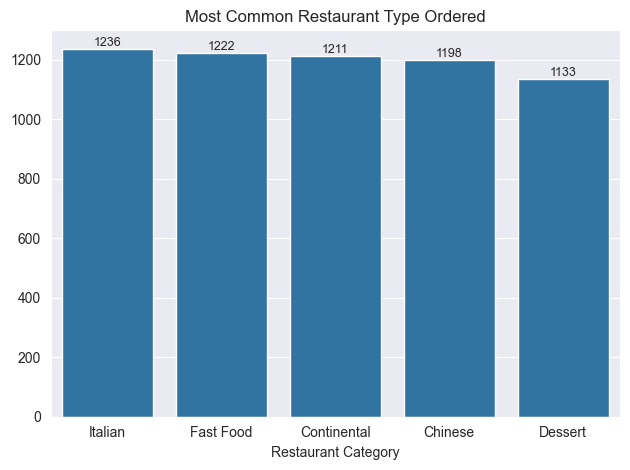

In [21]:
# using 'category' column

sns.set_style('darkgrid')
ax = sns.countplot(x = 'category', data = df, order = df['category'].value_counts().index)
plt.xlabel('Restaurant Category')
plt.ylabel('')
plt.title('Most Common Restaurant Type Ordered')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2, 
        height + 0.5,                   
        f'{int(height)}',               
        ha='center', va='bottom',       
        fontsize=9
    )

plt.tight_layout()
plt.show()

### 3. Peak days of the week for orders

In [22]:
df.dtypes

customer_id                object
gender                     object
age                        object
city                       object
signup_date                object
order_id                   object
order_date         datetime64[ns]
restaurant_name            object
dish_name                  object
category                   object
quantity                    int64
price                     float64
payment_method             object
order_frequency             int64
last_order_date            object
loyalty_points              int64
churned                    object
rating                      int64
rating_date                object
delivery_status            object
dtype: object

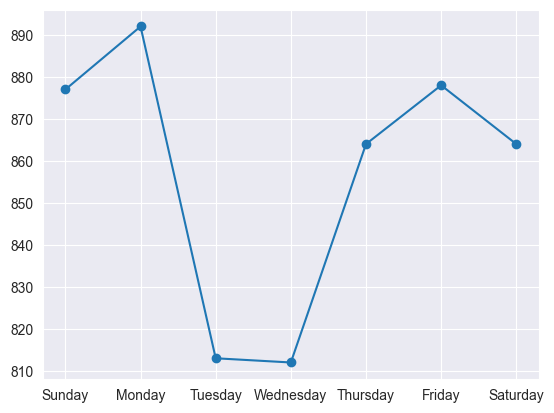

In [23]:
# day name extraction
df['day_of_week'] = df['order_date'].dt.day_name()
daily_orders = df['day_of_week'].value_counts().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.plot(daily_orders.index, daily_orders.values, marker = 'o')
plt.show()

### 4. Average rating given by customers

In [24]:
# mean (overall average by customers)
df['rating'].mean()

np.float64(2.9968333333333335)

In [25]:
# mean (by restaurant type)
df.groupby('category')['rating'].mean()

category
Chinese        3.006678
Continental    2.997523
Dessert        3.050309
Fast Food      2.954992
Italian        2.978964
Name: rating, dtype: float64

## Delivery Performance

In [26]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,...,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status,day_of_week
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,2023-08-23,McDonald's,Burger,Italian,...,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled,Wednesday
1,C2831,Male,Adult,Multan,7/7/2024,O6831,2023-08-23,KFC,Burger,Italian,...,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed,Wednesday
2,C2851,Other,Senior,Multan,6/20/2025,O6851,2023-08-23,Pizza Hut,Fries,Italian,...,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed,Wednesday
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,2023-08-23,Subway,Pizza,Dessert,...,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed,Wednesday
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,2023-08-24,KFC,Sandwich,Dessert,...,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled,Thursday


In [27]:
success_rate = (df['delivery_status'].value_counts(normalize=True)['Delivered']) * 100
print(f"Delivery success rate: {success_rate: .2f}%")

Delivery success rate:  34.33%


## Restaurant Insights

In [28]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,...,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status,day_of_week
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,2023-08-23,McDonald's,Burger,Italian,...,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled,Wednesday
1,C2831,Male,Adult,Multan,7/7/2024,O6831,2023-08-23,KFC,Burger,Italian,...,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed,Wednesday
2,C2851,Other,Senior,Multan,6/20/2025,O6851,2023-08-23,Pizza Hut,Fries,Italian,...,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed,Wednesday
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,2023-08-23,Subway,Pizza,Dessert,...,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed,Wednesday
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,2023-08-24,KFC,Sandwich,Dessert,...,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled,Thursday


### 1. Restaurant that receive the most orders


In [29]:
df['restaurant_name'].value_counts()

restaurant_name
Subway         1260
Pizza Hut      1224
KFC            1224
Burger King    1151
McDonald's     1141
Name: count, dtype: int64

### 2. Average ratings per restaurant

In [30]:
df.groupby('restaurant_name')['rating'].mean()

restaurant_name
Burger King    2.966116
KFC            2.974673
McDonald's     3.002629
Pizza Hut      2.949346
Subway         3.087302
Name: rating, dtype: float64

### 3. Restaurant rating vs. Number of orders

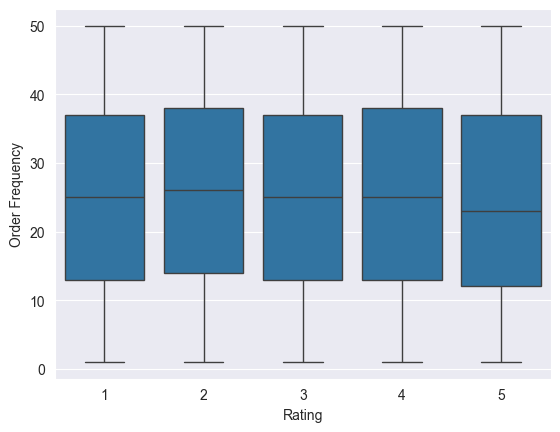

In [31]:
sns.boxplot(x='rating', y='order_frequency', data=df)
plt.xlabel('Rating')
plt.ylabel('Order Frequency')
plt.show()

### 4. Do higher-rated restaurants have faster delivery times?

In [32]:
high_rating_mask = df['rating'] >= 4.0
high_resto_mean = df.loc[high_rating_mask, 'rating'].mean()
low_mid_resto_mean = df.loc[~high_rating_mask, 'rating'].mean()

In [33]:
result = high_resto_mean > low_mid_resto_mean
result

np.True_

## Payment and Order Details

In [34]:
df['payment_method'].unique()

array(['Cash', 'Wallet', 'Card'], dtype=object)

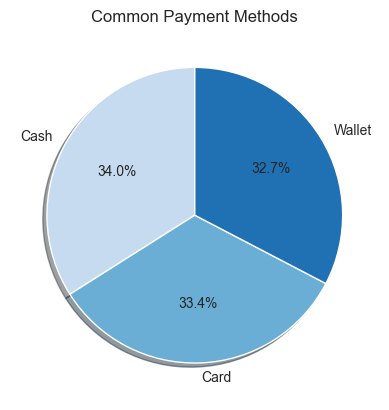

In [35]:
payment_count = df['payment_method'].value_counts()

colors = sns.color_palette("Blues", len(payment_count))
plt.pie(payment_count, labels = payment_count.index, autopct = '%1.1f%%', startangle = 90, colors = colors, shadow = True)
plt.title("Common Payment Methods")
plt.show()

## Trends and Seasonality

In [36]:
df.dtypes

customer_id                object
gender                     object
age                        object
city                       object
signup_date                object
order_id                   object
order_date         datetime64[ns]
restaurant_name            object
dish_name                  object
category                   object
quantity                    int64
price                     float64
payment_method             object
order_frequency             int64
last_order_date            object
loyalty_points              int64
churned                    object
rating                      int64
rating_date                object
delivery_status            object
day_of_week                object
dtype: object

### 1. Orders over time

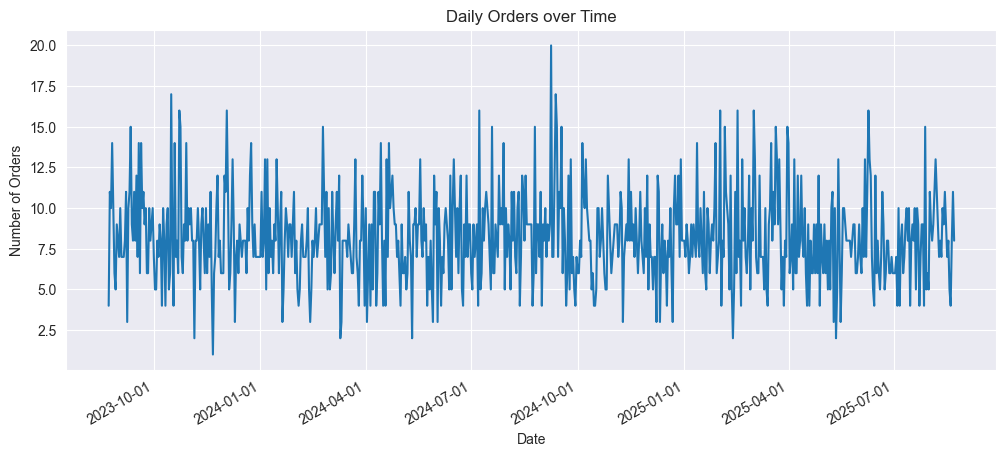

In [37]:
# daily total orders
daily_orders = df.groupby(df['order_date'].dt.date)['order_id'].count()

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(daily_orders.index, daily_orders.values)

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders')
ax.set_title('Daily Orders over Time')
plt.show()


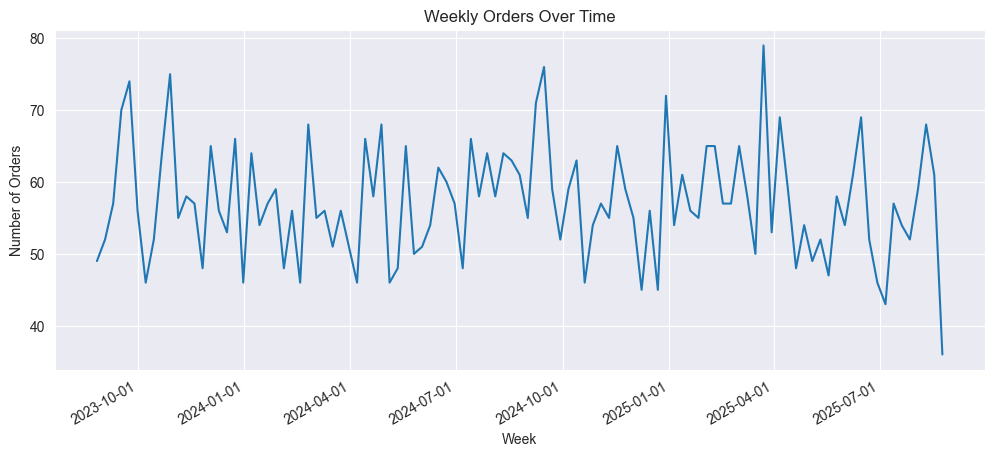

In [38]:
# weekly total orders
weekly_orders = df.set_index('order_date').resample('W')['order_id'].count()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(weekly_orders.index, weekly_orders.values)

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('Week')
ax.set_ylabel('Number of Orders')
ax.set_title('Weekly Orders Over Time')

fig.autofmt_xdate()
plt.show()


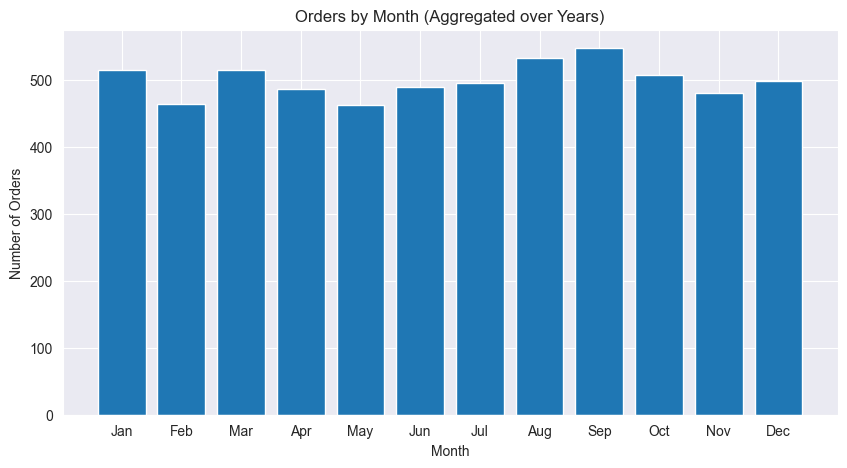

In [39]:
# montly orders
df['month'] = df['order_date'].dt.month

monthly_orders = df.groupby('month')['order_id'].count().sort_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(months, monthly_orders.values)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Orders')
ax.set_title('Orders by Month (Aggregated over Years)')

plt.show()

#### Month-over-Year (MoY) Comparison

In [40]:
df['order_date'].dtype

dtype('<M8[ns]')

In [41]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

In [42]:
df_2023 = df[df['year'] == 2023]
df_2024 = df[df['year'] == 2024]
df_2025 = df[df['year'] == 2025]

months = list(range(1, 13))
monthly_2023 = df_2023.groupby('month')['order_id'].count().reindex(months, fill_value=0)
monthly_2024 = df_2024.groupby('month')['order_id'].count().reindex(months, fill_value=0)
monthly_2025 = df_2025.groupby('month')['order_id'].count().reindex(months, fill_value=0)

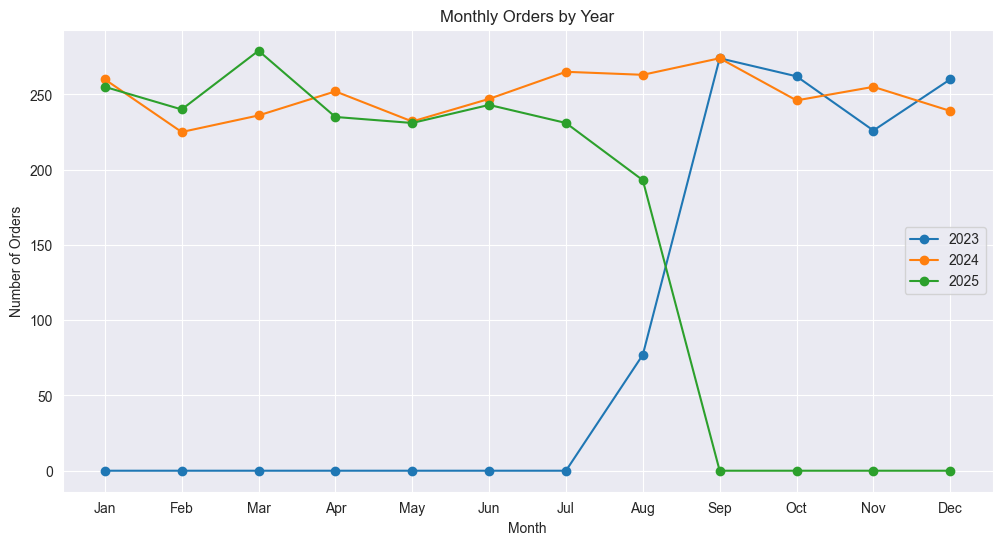

In [43]:
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x = months

plt.figure(figsize=(12,6))
plt.plot(x, monthly_2023.values, marker='o', label='2023')
plt.plot(x, monthly_2024.values, marker='o', label='2024')
plt.plot(x, monthly_2025.values, marker='o', label='2025')

plt.xticks(ticks=x, labels=month_labels)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Orders by Year')
plt.legend()
plt.show()

### 2. How do ratings vary across months?

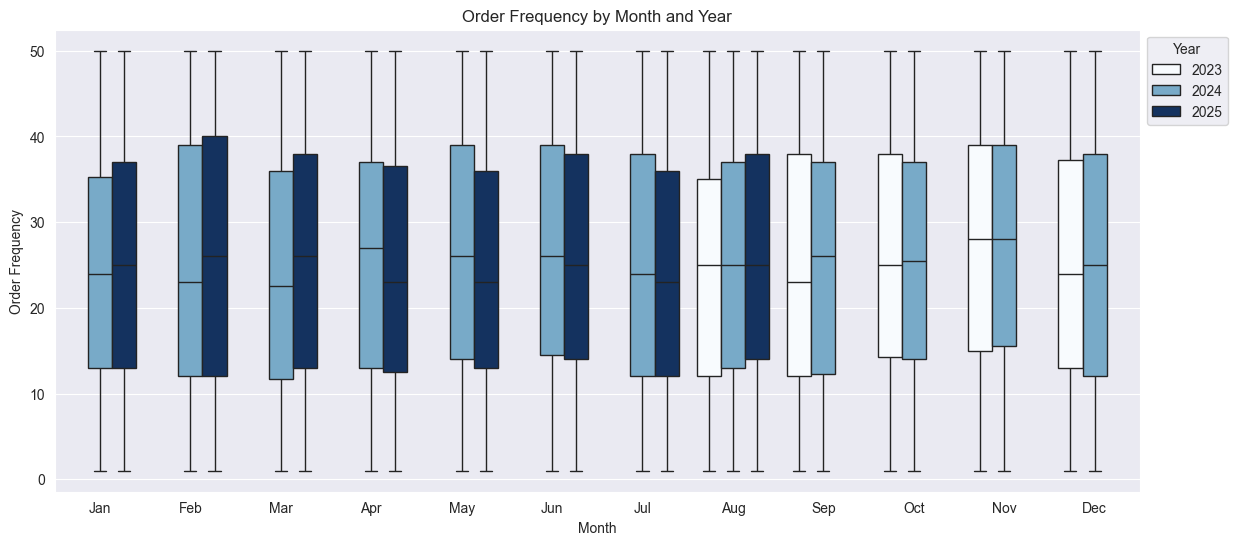

In [44]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['month_name'] = df['order_date'].dt.strftime('%b') 

plt.figure(figsize=(14,6))
sns.boxplot(
    x='month_name',
    y='order_frequency',
    hue='year',
    data=df,
    palette='Blues',
    order=month_order 
)

plt.xlabel('Month')
plt.ylabel('Order Frequency')
plt.title('Order Frequency by Month and Year')

plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


### 3. Noticeable growth/decline trends in order volume

In [45]:
df.head()

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,...,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status,day_of_week,month,year,month_name
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,2023-08-23,McDonald's,Burger,Italian,...,7/19/2025,238,Active,3,10/14/2024,Cancelled,Wednesday,8,2023,Aug
1,C2831,Male,Adult,Multan,7/7/2024,O6831,2023-08-23,KFC,Burger,Italian,...,11/25/2024,81,Active,2,8/21/2025,Delayed,Wednesday,8,2023,Aug
2,C2851,Other,Senior,Multan,6/20/2025,O6851,2023-08-23,Pizza Hut,Fries,Italian,...,5/10/2025,82,Inactive,3,9/19/2024,Delayed,Wednesday,8,2023,Aug
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,2023-08-23,Subway,Pizza,Dessert,...,7/24/2025,45,Inactive,2,6/29/2025,Delayed,Wednesday,8,2023,Aug
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,2023-08-24,KFC,Sandwich,Dessert,...,12/21/2024,418,Inactive,3,3/6/2025,Cancelled,Thursday,8,2023,Aug


In [46]:
df['order_frequency']

0       38
1       24
2       42
3       27
4       35
        ..
5995    28
5996    12
5997    31
5998    37
5999     2
Name: order_frequency, Length: 6000, dtype: int64

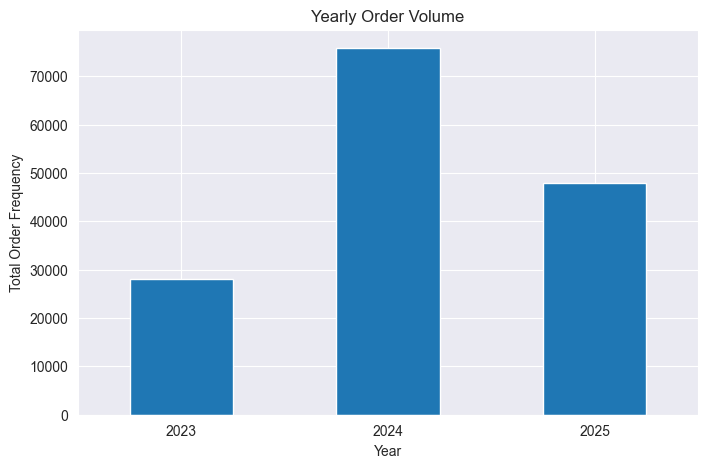

In [47]:
yearly_orders = df.groupby('year')['order_frequency'].sum()

plt.figure(figsize=(8,5))
yearly_orders.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Order Frequency')
plt.title('Yearly Order Volume')
plt.xticks(rotation=0)
plt.show()